# Saudi Used Cars Sales Analysis 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("UsedCarsSA_Clean_EN.csv")
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


## Exploaring The Data 

In [5]:
df.info() #no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


### lets check for duplicates 

if there duplicates we don't have a index to see if it's really duplicate maybe it is similar case so we keep them also it is sales data we need to keep it to study it 

In [8]:
df.duplicated().sum()

3

In [9]:
duplicates=df[df.duplicated(keep=False)]
print(duplicates)

        Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
1354    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
1387    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
2027    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
3201    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
4272  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   
5070  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
1354  Automatic   122000  Dammam  69000       False  
1387  Automatic   108000  Dammam  97000       False  
2027  Automatic   122000  Dammam  69000       False  
3201  Automatic   108000  Dammam  97000       False  
4272  Automatic   185000  Riyadh      0        True  
5070  Automatic   185000  Riyadh      0        True  


In [10]:
df.describe() #lets check numerics

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


In [11]:
df.describe(include="O") #check categoricals

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8035,8035,8035,8035,8035,8035,8035,8035
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2038,372,5962,3478,3193,7861,6971,3237


that tells us:

top Make is **Toyota**

top type is **Land Cruiser**

top options is **Full options**

top fuel type is **Gas**

top gear type is **Automatic**

top region is **Riyadh**    

In [13]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


notice here that every time the price is **0** Negotiable is **True** 
This suggests that these cars are **not yet sold** or their prices have not been finalized. It's likely that sellers marked the price as 0 and used the `Negotiable` flag to indicate the price will be set after negotiation.


# Lets check the outliers and deal with it 

## Numerical Columns

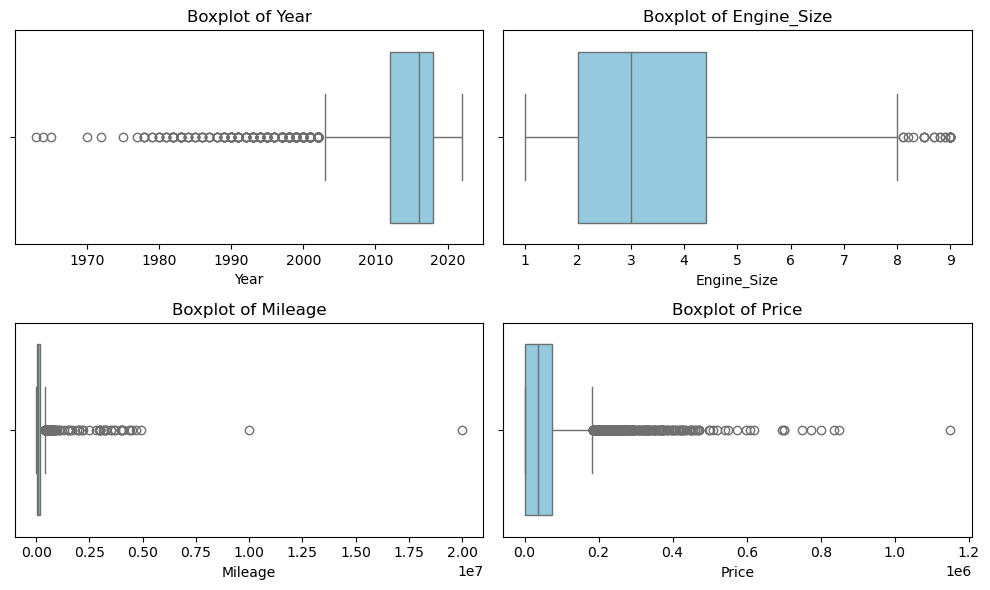

In [17]:
cols = ['Year', 'Engine_Size', 'Mileage', 'Price']

plt.figure(figsize=(10, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### to deal with the **outliers** i will use the iqr method to **Flag the outliers** for further study 

In [19]:
for col in ["Price", "Mileage","Year","Engine_Size"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[f"{col}_outlier_flag"] = (
    (df[col] < lower_bound) | (df[col] > upper_bound)
    )

In [20]:
# Ensure rounding, then convert to int
df["Year"] = df["Year"].round().astype(int)


In [21]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Price_outlier_flag,Mileage_outlier_flag,Year_outlier_flag,Engine_Size_outlier_flag
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False,False,False,False,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True,False,False,False,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False,False,False,False,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False,False,False,False,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False,False,False,False,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False,False,False,False,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True,False,False,False,False
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False,False,False,False,False


# insights

In [23]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Price_outlier_flag,Mileage_outlier_flag,Year_outlier_flag,Engine_Size_outlier_flag
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False,False,False,False,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True,False,False,False,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False,False,False,False,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False,False,False,False,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False,False,False,False,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False,False,False,False,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True,False,False,False,False
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False,False,False,False,False


In [24]:
price_per_year=df.pivot_table(index="Year",values="Price",aggfunc=["mean","max","min"])
price_per_year

,mean,max,min
,Price,Price,Price
Year,,,
1963,22000.000000,22000,22000
1964,75000.000000,75000,75000
1965,0.000000,0,0
1970,45000.000000,45000,45000
1972,42000.000000,42000,42000
1975,0.000000,0,0
1977,0.000000,0,0
1978,15333.333333,28000,0


### Each cell shows how much total/max/min/avg money is listed/sold in that year.

<Axes: xlabel='Options', ylabel='Price'>

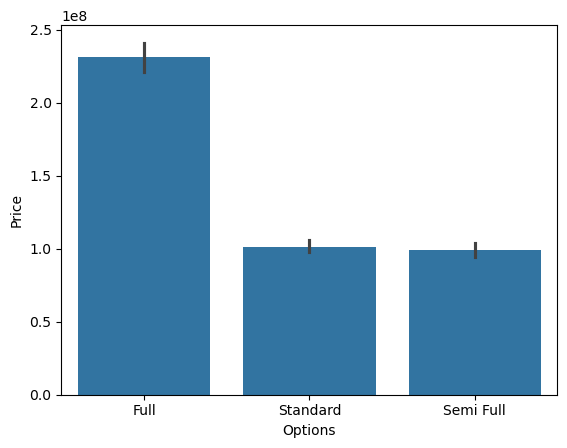

In [26]:
sns.barplot(data=df,x="Options",y="Price",estimator=sum)


### Total listed value of all cars with a certain “Options” package.

<Axes: xlabel='Fuel_Type', ylabel='count'>

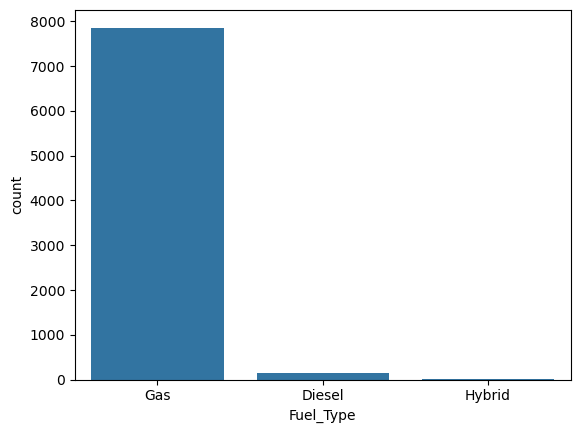

In [28]:
sns.countplot(data=df,x="Fuel_Type")

<Axes: xlabel='Negotiable', ylabel='count'>

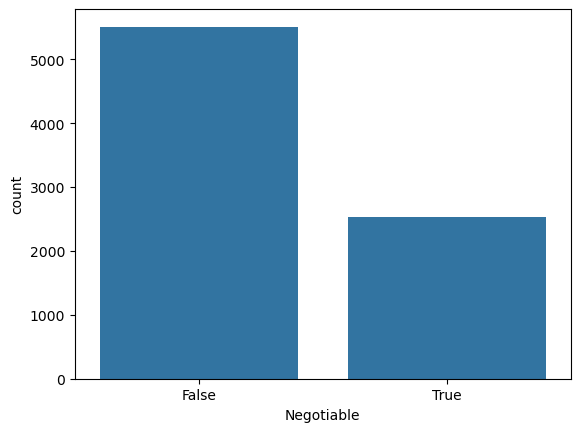

In [29]:
sns.countplot(data=df,x="Negotiable")

### the number of cars that listed/sold and not sold

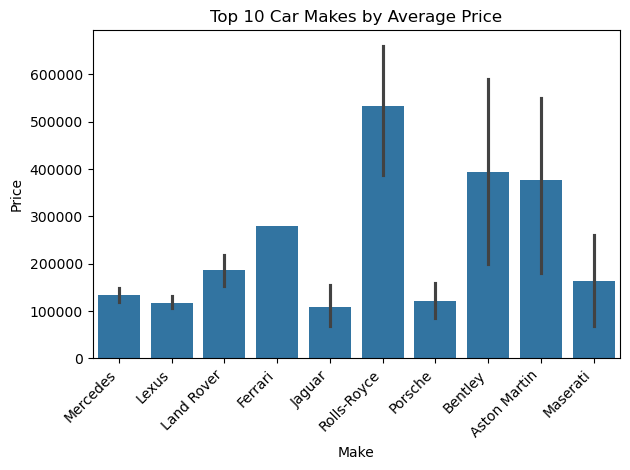

In [31]:
top_makes = df.groupby("Make")["Price"].mean().nlargest(10).index
filtered_df = df[df["Make"].isin(top_makes)]

sns.barplot(data=filtered_df, x="Make", y="Price")
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.title("Top 10 Car Makes by Average Price")
plt.tight_layout()

### **Ferrari ,rolls-royce and aston martin** is the highest price cars

<Axes: xlabel='Gear_Type', ylabel='Mileage'>

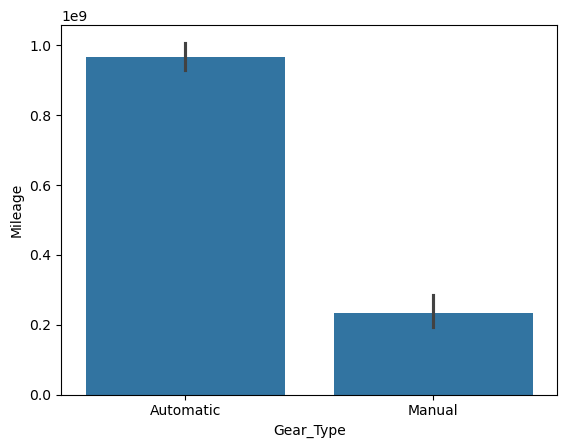

In [33]:
sns.barplot(data=df,x="Gear_Type",y="Mileage",estimator=sum)


### total miles with automatic cars is more 

<Axes: xlabel='Gear_Type', ylabel='Price'>

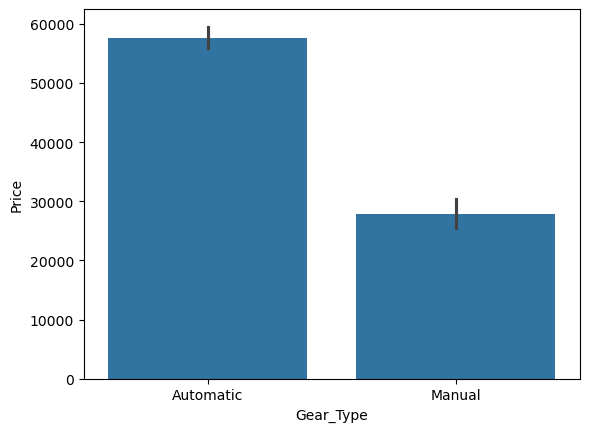

In [35]:
sns.barplot(data=df,x="Gear_Type",y="Price")


### automatic cars is more expensive

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Riyadh'),
  Text(1, 0, 'Jeddah'),
  Text(2, 0, 'Dammam'),
  Text(3, 0, 'Al-Medina'),
  Text(4, 0, 'Qassim'),
  Text(5, 0, 'Makkah'),
  Text(6, 0, 'Jazan'),
  Text(7, 0, 'Tabouk'),
  Text(8, 0, 'Aseer'),
  Text(9, 0, 'Hail'),
  Text(10, 0, 'Taef'),
  Text(11, 0, 'Al-Ahsa'),
  Text(12, 0, 'Abha'),
  Text(13, 0, 'Hafar Al-Batin'),
  Text(14, 0, 'Sabya'),
  Text(15, 0, 'Besha'),
  Text(16, 0, 'Khobar'),
  Text(17, 0, 'Al-Baha'),
  Text(18, 0, 'Yanbu'),
  Text(19, 0, 'Al-Namas'),
  Text(20, 0, 'Jubail'),
  Text(21, 0, 'Najran'),
  Text(22, 0, 'Al-Jouf'),
  Text(23, 0, 'Arar'),
  Text(24, 0, 'Wadi Dawasir'),
  Text(25, 0, 'Qurayyat'),
  Text(26, 0, 'Sakaka')])

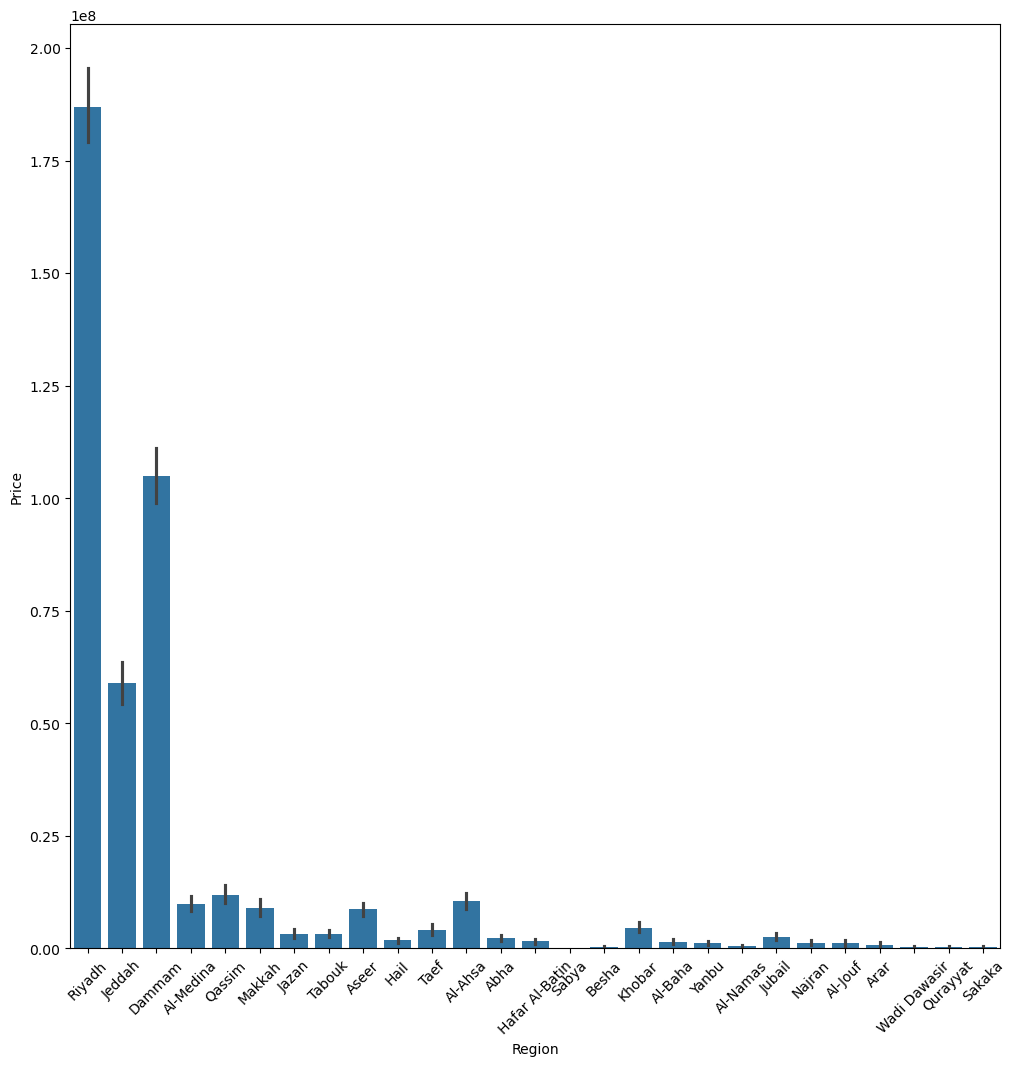

In [37]:
plt.figure(figsize=(12,12))
sns.barplot(data=df,x="Region",y="Price",estimator=sum)
plt.xticks(rotation=45)

### Each bar represents a region, and its height is the total price of all listed cars from that region.**Riyadh and Jeddah** is the regions with the highest total value of used cars 


# Adding features

In [40]:
negotiable_cars=df[df["Price"]==0] #only negotiable cars to be easy to see
negotiable_cars

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Price_outlier_flag,Mileage_outlier_flag,Year_outlier_flag,Engine_Size_outlier_flag
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True,False,False,False,False
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True,False,False,False,False
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True,False,False,False,False
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True,False,False,False,False
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True,False,False,False,False
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True,False,True,False,False
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True,False,False,False,False
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True,False,True,False,False


In [41]:
price_per_make=df.pivot_table(index="Make",values="Price",aggfunc=["mean","max","min"])
price_per_make

,mean,max,min
,Price,Price,Price
Make,,,
Aston Martin,376666.666667,550000,180000
Audi,88173.076923,325000,0
BMW,96745.454545,465000,0
BYD,7000.000000,28000,0
Bentley,393928.571429,850000,100000
Cadillac,89423.913043,280000,0
Changan,33240.740741,98000,0
Chery,26750.000000,42500,11000


In [42]:
count_type_per_make=df.pivot_table(index="Make",values="Type",aggfunc=["max","min"])
count_type_per_make

,max,min
,Type,Type
Make,,
Aston Martin,Vantage,DB9
Audi,S8,A3
BMW,Z,The 3
BYD,S7,F3
Bentley,Flying Spur,Arnage
Cadillac,XT5,ATS
Changan,V7,CS35
Chery,Tiggo,QQ


In [43]:
average_price_per_options=df.pivot_table(index="Options",values="Price",aggfunc=["mean","max","min"])
average_price_per_options

,mean,max,min
,Price,Price,Price
Options,,,
Full,72338.092076,1150000,0
Semi Full,44361.838710,390000,0
Standard,38883.919157,772500,0


### Car Age

In [45]:
df["Car_Age"] = 2025 - df["Year"]

### check luxry cars by brands

In [47]:
df["Make"].unique() #to flag luxry brands 

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'GMC',
       'Chevrolet', 'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'Mazda',
       'Ford', 'Kia', 'Genesis', 'Cadillac', 'Geely', 'MG', 'Jeep',
       'INFINITI', 'Dodge', 'Ferrari', 'Great Wall', 'Jaguar', 'GAC',
       'Renault', 'Suzuki', 'Peugeot', 'Changan', 'HAVAL', 'BMW',
       'Rolls-Royce', 'Porsche', 'Mitsubishi', 'Isuzu', 'Subaru',
       'Zhengzhou', 'Lincoln', 'Volkswagen', 'Daihatsu', 'FAW', 'Chery',
       'Audi', 'Bentley', 'Aston Martin', 'Mercury', 'Fiat', 'BYD',
       'Classic', 'Hummer', 'Other', 'Maserati', 'SsangYong', 'Lifan',
       'Foton', 'Tata', 'Victory Auto', 'Škoda', 'Iveco'], dtype=object)

In [48]:
luxury_brands = [
    'Mercedes', 'BMW', 'Lexus', 'Cadillac', 'INFINITI', 'Audi', 'Porsche',
    'Land Rover', 'Jaguar', 'Rolls-Royce', 'Bentley', 'Aston Martin', 'Maserati', 'Ferrari', 'Genesis'
]


In [49]:
df["Is_Luxury"] = df["Make"].isin(luxury_brands) 


In [50]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Price_outlier_flag,Mileage_outlier_flag,Year_outlier_flag,Engine_Size_outlier_flag,Car_Age,Is_Luxury
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False,False,False,False,False,7,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True,False,False,False,False,9,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False,False,False,False,False,6,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False,False,False,False,False,6,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False,False,False,False,False,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False,False,False,False,False,10,True
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False,False,False,False,False,15,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True,False,False,False,False,12,False
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False,False,False,False,False,14,False


# Save the data

In [85]:
with pd.ExcelWriter("Cleaned_Saudi_cars.xlsx") as writer:
    df.to_excel(writer,sheet_name="Main",index=False)
    negotiable_cars.to_excel(writer,sheet_name="negotiable_cars",index=True)
    count_type_per_make.to_excel(writer,sheet_name="count_type_per_make",index=True)
    price_per_make.to_excel(writer,sheet_name="price_per_make",index=True)